# MongoDB Dashboard for Metacritic movie data
DA 230 Midterm

Author: Heather Marie

Contributers: Ted Spence

In [24]:
# Retrieve collection from MongoDB

# Import modules
import json
import pymongo
import certifi
import pandas

# Retrieve credentials for SQL Server from credentials file
# Loading the json file that containins my secret MongoDB connection string
with open (r'C:\Users\hsely\OneDrive\Documents\GitHub\DA320\Midterm\credentials.json') as u:
    data = json.load(u)
    secret_key = data['mongodb']

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

# Connecting to database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetching my database titled "DA320"
da320_database = client['DA320']
metacritic_data = da320_database['Metacritic']
metacritic = pandas.DataFrame(metacritic_data.find())

# Accessing my collections from my "DA320" database
allCollections = da320_database.list_collection_names()

# Print statements that display the current version as well as the collections present in DA320
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

My secret key is 67 characters in length.
Using MongoDB version 5.0.14.
This database has the collections ['IMDB', 'Metacritic', 'IMDB_Pipeline_View']


In [25]:
# Transforming data in Pandas

# Convert release dates into actual dates and gather year/month
metacritic.release_date = pandas.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.score = pandas.to_numeric(metacritic.score)
metacritic.head()

,_id,movie_id,title,release_date,description,score,thumbnail,year,month
0,637d823d94a39c45aea68fa8,11234,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,637d823d94a39c45aea68fa9,11235,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,637d823d94a39c45aea68faa,11236,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,637d823d94a39c45aea68fab,11237,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,637d823d94a39c45aea68fac,11238,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


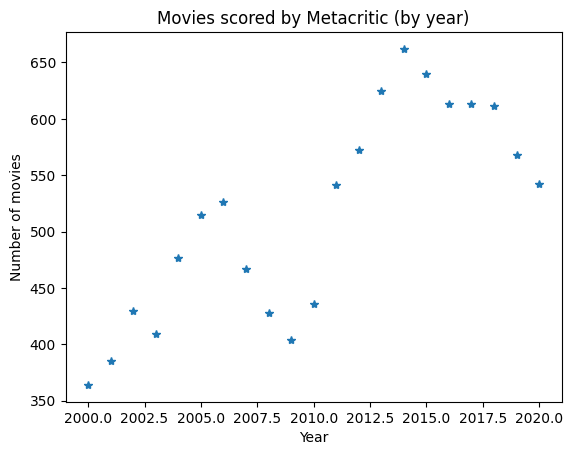

In [26]:
# Create XY scatter plot of movie scores by Metacritic by year 2000-2020

from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter

# Setup labels on axis
pyplot.title('Movies scored by Metacritic (by year)')
pyplot.xlabel('Year')
pyplot.ylabel('Number of movies')

# Count movies measured by metacritic by year and plot the results
df = metacritic['release_date'].groupby(metacritic.year).agg('count')
pyplot.plot(df, '*')
pyplot.show()

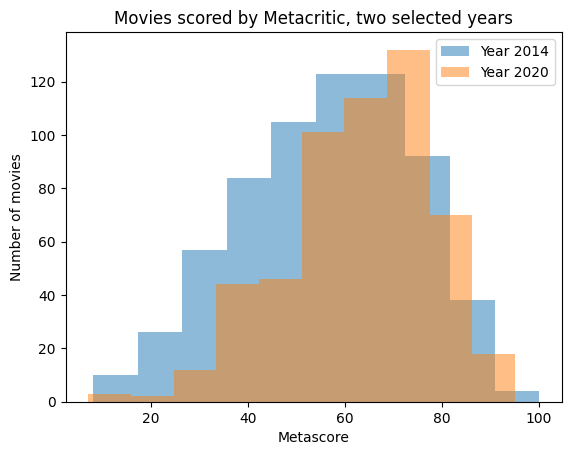

In [27]:
# Compare overlaid histograms of Metacritic movie scores from years 2014 and 2020

from matplotlib import pyplot

#Retrieve metascore for two different years
scores_2014 = metacritic[metacritic['year'] == 2014].score
scores_2020 = metacritic[metacritic['year'] == 2020].score

# Plot data into buckets
pyplot.title("Movies scored by Metacritic, two selected years")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of movies')
pyplot.hist(scores_2014, alpha=0.5, label = 'Year 2014')
pyplot.hist(scores_2020, alpha = 0.5, label = 'Year 2020')
pyplot.legend(loc='upper right')
pyplot.show()



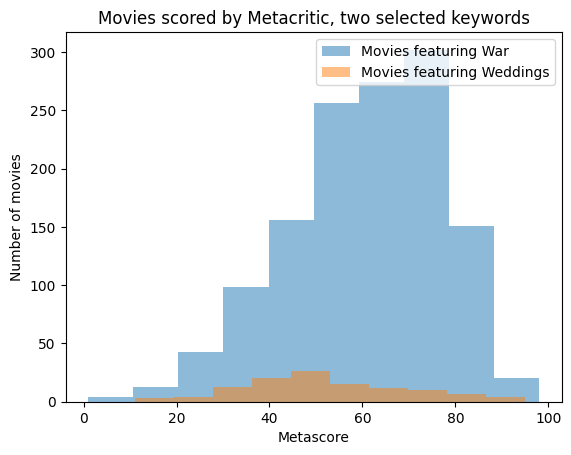

In [28]:
# Comparing overlaid histograms of all movie scores by keywords comparing 'Wedding' to 'War' on Metacritic

from matplotlib import pyplot

# Retrieve metascore for 2 different years
scores_wedding = metacritic[metacritic['description'].str.contains("wedding")].score
scores_war = metacritic[metacritic['description'].str.contains("war")].score

# Plot data into buckets
pyplot.title("Movies scored by Metacritic, two selected keywords")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of movies')
pyplot.hist(scores_war, alpha=0.5, label = 'Movies featuring War')
pyplot.hist(scores_wedding, alpha = 0.5, label = 'Movies featuring Weddings')
pyplot.legend(loc='upper right')
pyplot.show()